
# MA124 Maths by Computer: Assignment 2
## The SIR model - flattening the curve 

---

The [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model)  is given by the following system of ODEs

$$
\dot S  = - \frac{\beta S I}{N}, \quad 
\dot I  = \frac{\beta S I}{N} - \gamma I, \quad 
\dot R  = \gamma I,
$$

where $S$ is the number of susceptible individuals, $I$ is the number of infectious individuals, $R$ is the number of recovered or removed individuals. $N$ is the total number of individuals, i.e. $N = S+I+R$. One can easily verify that $\dot N = 0$ by adding the three equations. Hence $N$ is constant. $\beta$ and $\gamma$ are parameters: $\beta$ is the average number of contacts per person per time, $\gamma$ is the reciprocal of the time an individual remains infectious.

The SIR model can be used to understand important aspect of infectious diseases such as Covid-19. Here we will use it to understand interventions that [flatten the curve](https://en.wikipedia.org/wiki/Flattening_the_curve).

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Part A. Baseline solution of SIR model

We first find a baseline solution of the SIR model corresponding to the evolution of a disease without any mitigation strategy. Results are shown below for specific parameter values: 

$$\beta = 0.3  \quad \gamma = 0.1$$ 

The initial conditions are 
$$
S(0) = 10^6 - 5, \quad I(0) = 5, \quad R(0) = 0 
$$

So, we start with only 5 infectious individuals in a population of size $N=10^6$. 

The first plot below shows the time series of the three variables. Time can be thought of a measured in days so 180 days is about 6 months. The model captures the basics of the disease progression where the number of infectious individuals initially grows (outbreak). Eventually the number of infections individuals reaches a peak and thereafter decreases. 

The second plot shows a phase portrait in the $(S,I)$ plane. A marker indicates the peak in the infectious individuals. The peak number of infectious individuals is printed. 

In [2]:
# --- First define the RHS of ODE system --- #

def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 0.3
    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

In [3]:
# --- Problem setup --- #

# set up time grid for solution
tf = 180
Nsteps = 1800
t = np.linspace(0, tf, Nsteps+1)

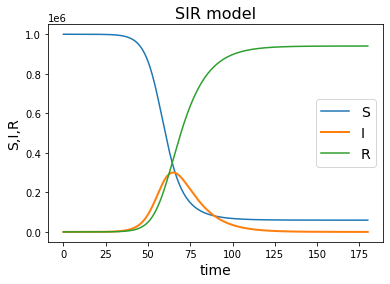

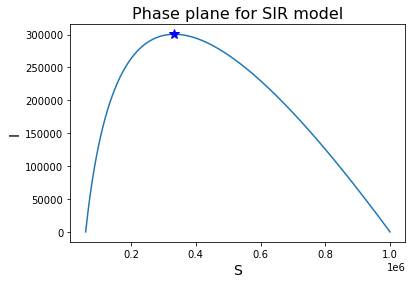

The peak number of infectious individuals is 300464


In [4]:
# --- Call the ODE solver and extract solutions --- #

# Set initial conditions and put into array y0
S0 = 10.0**6 - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

# find the index where I is max and save t, I and S there
k = np.argmax(I)
t_max = t[k]
I_max = I[k]
S_max = S[k]

# --- Plot various interesting things --- #

# plot the time evolution of S, I, R
# -----------------------------------
plt.plot(t, S, label="S")
plt.plot(t, I, lw = 2, label="I")
plt.plot(t, R, label="R")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot the S,I phase portrait
# ---------------------------
plt.plot(S, I)

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

# put a marker to show the peak number of infectious individuals
plt.plot(S_max, I_max, 'b*', markersize = 10)
plt.show()

# --- Report the peak of I  --- #

print("The peak number of infectious individuals is", round(I_max))


---

## Part B. Prior immunity

We now investigate the effect of prior immunity in the SIR model and compare to the baseline case. We use the same values of $\beta$ and $\gamma$ as in the baseline case, but change the initial condition to

$$
S(0) = 10^6 - 5 - R(0), \quad I(0) = 5, \quad R(0) = 2.5\times 10^5
$$

Hence the total population is still $N=10^6$, but we are starting with 25% of the population already in the recovered class. These can be thought of as individuals with prior immunity or as previously vaccinated individuals. We again start with only 5 infectious individuals.

The first plot below shows the time series of the three variables for both the baseline and the case with prior immunity. 

The second plot shows the time series only for the infectious individuals in
the baseline and the case with prior immunity. The flattening of the peak in the number of infectious individuals and the shift to later times is evident. 

The third plot shows a phase portrait in the $(S,I)$ plane for both cases. Markers indicate the peaks in the infectious individuals and the peak number of infectious individuals in both cases is printed. 

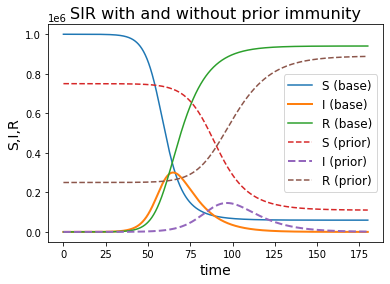

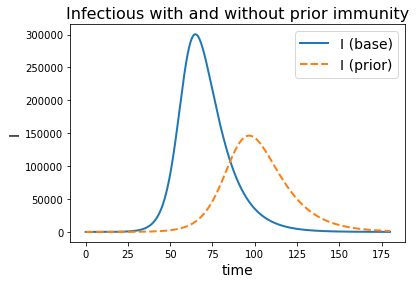

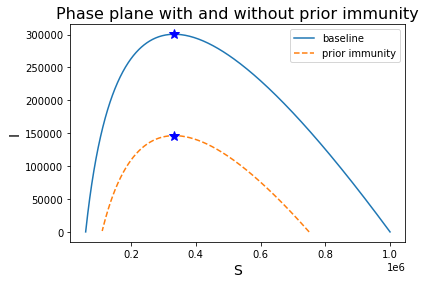

The baseline peak number of infectious individuals is 300464
With prior immunity the peak number of infectious individuals is 146359


In [5]:
# --- Call the ODE solver and extract solutions --- #
  
R0_prior = 250000
I0_prior = 5
S0_prior = 10.0**6 - I0_prior - R0_prior

y0 = np.array([S0_prior, I0_prior, R0_prior])
y_sol_prior = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S_prior = y_sol_prior[:,0]
I_prior = y_sol_prior[:,1]
R_prior = y_sol_prior[:,2]

# find the index where I_prior is max and save t, I and S there
k = np.argmax(I_prior)
t_prior_max = t[k]
I_prior_max = I_prior[k]
S_prior_max = S_prior[k]


# --- Plot various interesting things --- #


# plot the time evolution of S, I, R
# -----------------------------------
plt.plot(t, S, label="S (base)")
plt.plot(t, I, lw = 2, label="I (base)")
plt.plot(t, R, label="R (base)")

plt.plot(t, S_prior, "--", label="S (prior)")
plt.plot(t, I_prior, "--", lw = 2, label="I (prior)")
plt.plot(t, R_prior, "--", label="R (prior)")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR with and without prior immunity", fontsize=16)
plt.legend(fontsize=12)
plt.show()        


# plot the time evolution of just I
# ---------------------------------
plt.plot(t, I, lw = 2, label="I (base)")
plt.plot(t, I_prior, "--", lw = 2, label="I (prior)")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Infectious with and without prior immunity", fontsize=16)
plt.legend(fontsize=14)
plt.show()        


# plot the S,I phase portrait
# ---------------------------
plt.plot(S, I, label="baseline")
plt.plot(S_prior, I_prior, "--", label="prior immunity")

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane with and without prior immunity", fontsize=16)
plt.legend()

# put markers to show the peak number of infectious individuals
plt.plot(S_max, I_max, 'b*', markersize = 10)
plt.plot(S_prior_max, I_prior_max, 'b*', markersize = 10)
plt.show()

# --- Report the peak of I  --- #

print("The baseline peak number of infectious individuals is", round(I_max))
print("With prior immunity the peak number of infectious individuals is", round(I_prior_max))


---

## Part C. Social Distancing (mask mandate)


We now investigate the effect of social distancing, or a mask mandate. We will use the following simple approximation. When a mask mandate is in effect, the parameter $\beta$ will be reduced to 0.24, otherwise it will be 0.3, as in the baseline case. More specifically, we will consider $\beta$ to change between these two values according to:

$$
\beta = 0.3 \quad {\rm if} \quad t \le t_{m} \\
\beta = 0.24 \quad {\rm if} \quad t_{m} < t \le t_{m}+30 \\
\beta = 0.3 \quad {\rm if} \quad t_{m}+30 < t 
$$

$t_m$ corresponds to the time the mask mandate goes into effect. We consider a 30-day mandate period and so $t_m+30$ corresponds to the time the mask mandate is lifted. 

A Python function has been written to compute the RHS of the SIR model with $\beta$ varying in this way. By running the model for different values of $t_m$, it was determined that $t_m \simeq 42$ gave the smallest value for the peak number of infectious individuals. 


The first plot below shows the time series of the three variables for both the baseline and the case with masks. 

The second plot shows the time series only for the infectious individuals in
the baseline and the case with masks. The flattening of the peak in the number of infectious individuals when masks are used is evident. There is a small shift in the peak to later times. 

The third plot shows a phase portrait in the $(S,I)$ plane for both cases. Markers indicate the peaks in the infectious individuals and the peak number of infectious individuals in both cases is printed. 



In [6]:
# --- First define the RHS of ODE system --- #

def SIR_SD(y, t):
    # returns RHS of the SIR model with varying beta to model social distancing
    S, I, R = y

    # by trial and error the best time for masks on was found to be ~ 42
    t_m = 42 
    if t <= t_m or t > t_m+30:
        beta = 0.3
    else:
        beta = 0.24
    
    gamma = 0.1
        
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

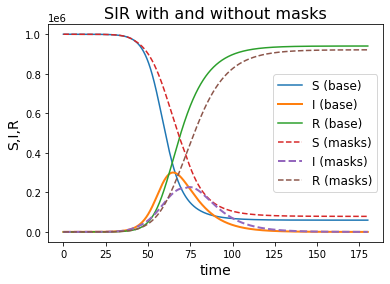

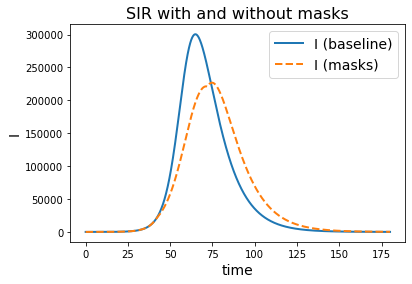

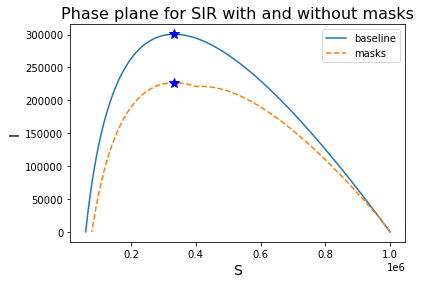

The baseline peak number of infectious individuals is 300464
With mask the peak number of infectious individuals is 226854


In [7]:
# --- Call the ODE solver and extract solutions --- #
  
# initial conditions same as above

y0 = np.array([S0, I0, R0])
y_sol_SD = odeint(SIR_SD, y0, t)

# extract S, I, R from the solution array y
S_SD = y_sol_SD[:,0]
I_SD = y_sol_SD[:,1]
R_SD = y_sol_SD[:,2]

# find the index where I_prior is max and save t, I and S there
k = np.argmax(I_SD)
t_SD_max = t[k]
I_SD_max = I_SD[k]
S_SD_max = S_SD[k]

# --- Plot various interesting things --- #

# plot the time evolution of S, I, R
# -----------------------------------
plt.plot(t, S, label="S (base)")
plt.plot(t, I, lw = 2, label="I (base)")
plt.plot(t, R, label="R (base)")

plt.plot(t, S_SD, "--", label="S (masks)")
plt.plot(t, I_SD, "--", lw = 2, label="I (masks)")
plt.plot(t, R_SD, "--", label="R (masks)")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR with and without masks", fontsize=16)
plt.legend(fontsize=12)
plt.show()        

# plot the time evolution of just I
# ---------------------------------
plt.plot(t, I, lw = 2, label="I (baseline)")
plt.plot(t, I_SD, "--", lw = 2, label="I (masks)")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("SIR with and without masks", fontsize=16)
plt.legend(fontsize=14)
plt.show()    

# plot the S,I phase portrait
# ---------------------------
plt.plot(S, I, label="baseline")
plt.plot(S_SD, I_SD, "--", label="masks")

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR with and without masks", fontsize=16)
plt.legend()

# put markers to show the peak number of infectious individuals
plt.plot(S_max, I_max, 'b*', markersize = 10)
plt.plot(S_SD_max, I_SD_max, 'b*', markersize = 10)
plt.show()

# --- Report the peak of I  --- #

print("The baseline peak number of infectious individuals is", round(I_max))
print("With mask the peak number of infectious individuals is", round(I_SD_max))

---

## Notes

You would not need this full amount of text to get high marks, but you do need to provide descriptions of what is plotted in each figure. One could include a short conclusion, although one was not given here. Notice that if the notebook is run and all code cells are collapsed, the notebook is readable as a short report. 


---